<a href="https://colab.research.google.com/github/g-roshan-007/CodSoft/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK - 01

TITANIC SURVIVAL PREDICTION

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Dataset
titanic = pd.read_csv('/content/tested.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Reading first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Reading last 5 rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Showing no. of rows and columns of dataset
titanic.shape

(418, 12)

In [ ]:
# checking for columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking for data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# checking for duplicated values
titanic.duplicated().sum()

0

In [ ]:
# checking for null values
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin    327
Age       86
Fare       1
dtype: int64

In [ ]:
# Cheecking what percentage column contain missing values
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [ ]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

# filling null values in Embarked Column with mode values of embarked column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [ ]:
# checking for null values
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            8
Age             80
Fare           169
Ticket         363
PassengerId    418
Name           418
dtype: int64

In [ ]:
titanic['Survived'].unique()

array([0, 1])

In [ ]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
titanic['Pclass'].unique()

array([3, 2, 1])

In [ ]:
titanic['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [ ]:
titanic['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

In [ ]:
titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# Showing inforamation about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
# showing info. about numerical columns
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# showing info. about numerical columns
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# showing info. about categorical columns
titanic.describe(include='O')

,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


In [ ]:
d1 = titanic['Sex'].value_counts()
d1

male      266
female    152
Name: Sex, dtype: int64

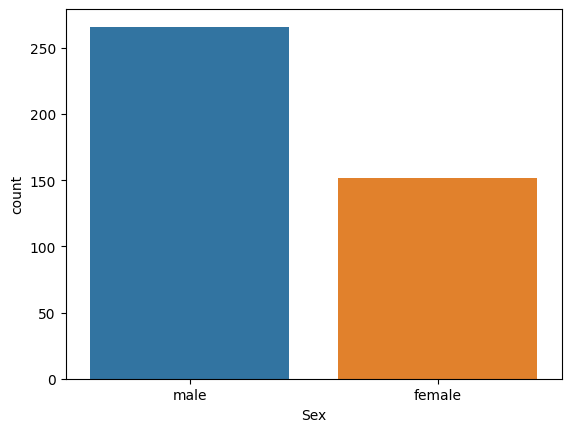

In [ ]:
sns.countplot(x=titanic['Sex'])
plt.show()

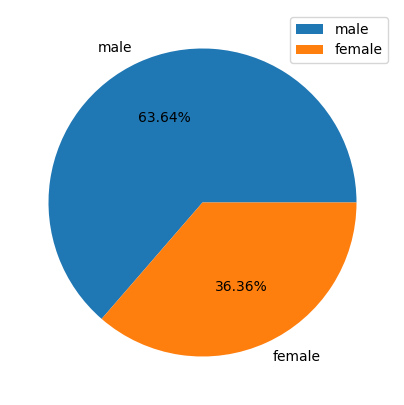

In [ ]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()


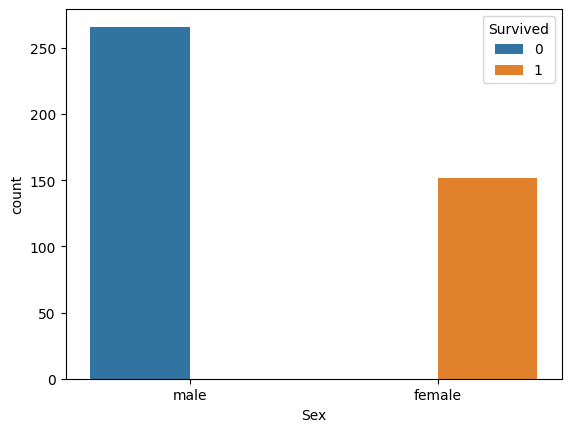

In [ ]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic['Sex'],hue=titanic['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

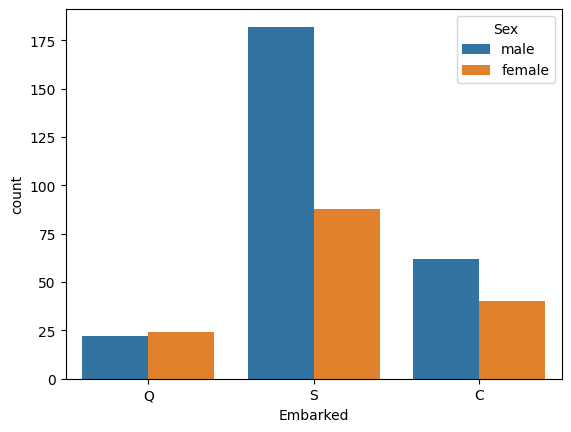

In [ ]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

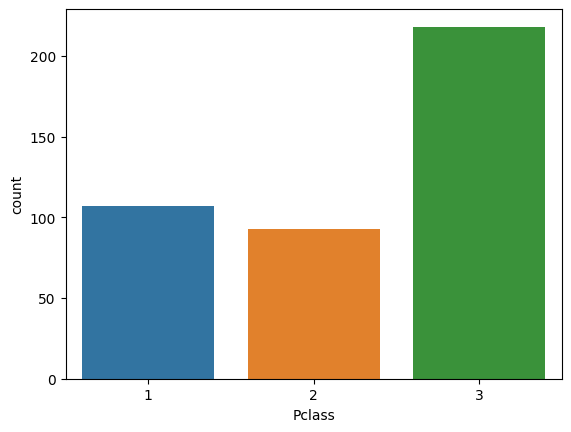

In [ ]:
# Plotting CountPlot for Pclass Column
sns.countplot(x=titanic['Pclass'])
plt.show()

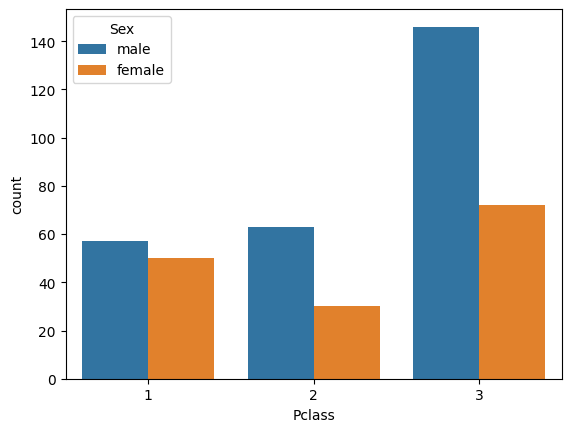

In [ ]:
# Showing Distribution of Pclass Sex wise
sns.countplot(x=titanic['Pclass'],hue=titanic['Sex'])
plt.show()

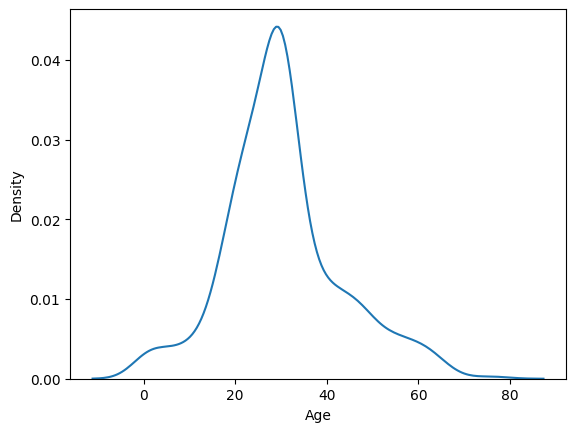

In [ ]:
# Age Distribution
sns.kdeplot(x=titanic['Age'])
plt.show()

0    266
1    152
Name: Survived, dtype: int64


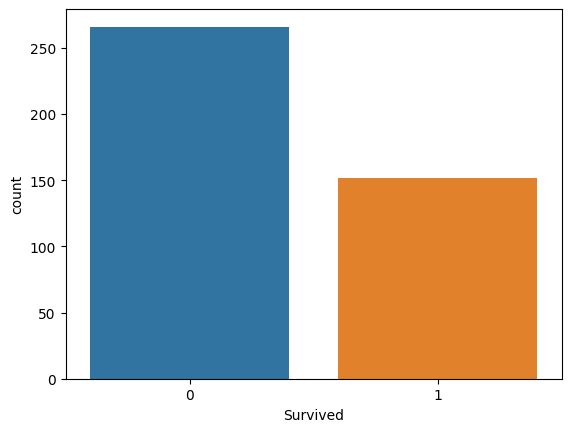

In [ ]:
# Plotting CountPlot for Survived Column
print(titanic['Survived'].value_counts())
sns.countplot(x=titanic['Survived'])
plt.show()

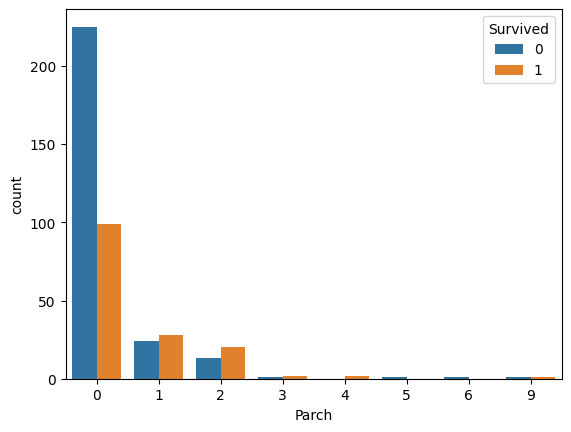

In [ ]:
# Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'])
plt.show()

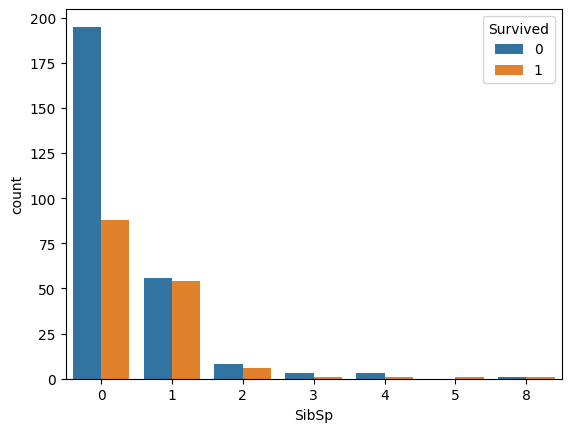

In [ ]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

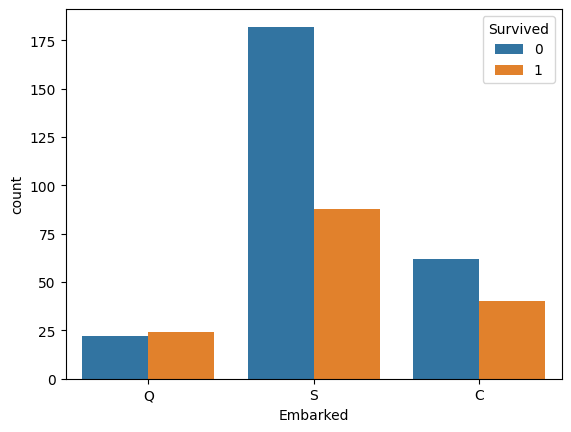

In [ ]:

# Showing Distribution of Embarked Survived wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'])
plt.show()

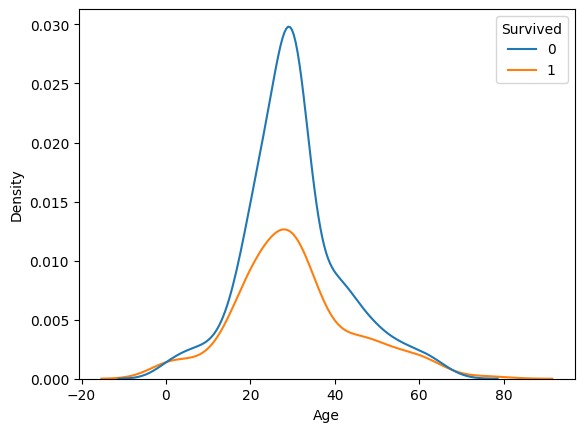

In [ ]:
# Showinf Distribution of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

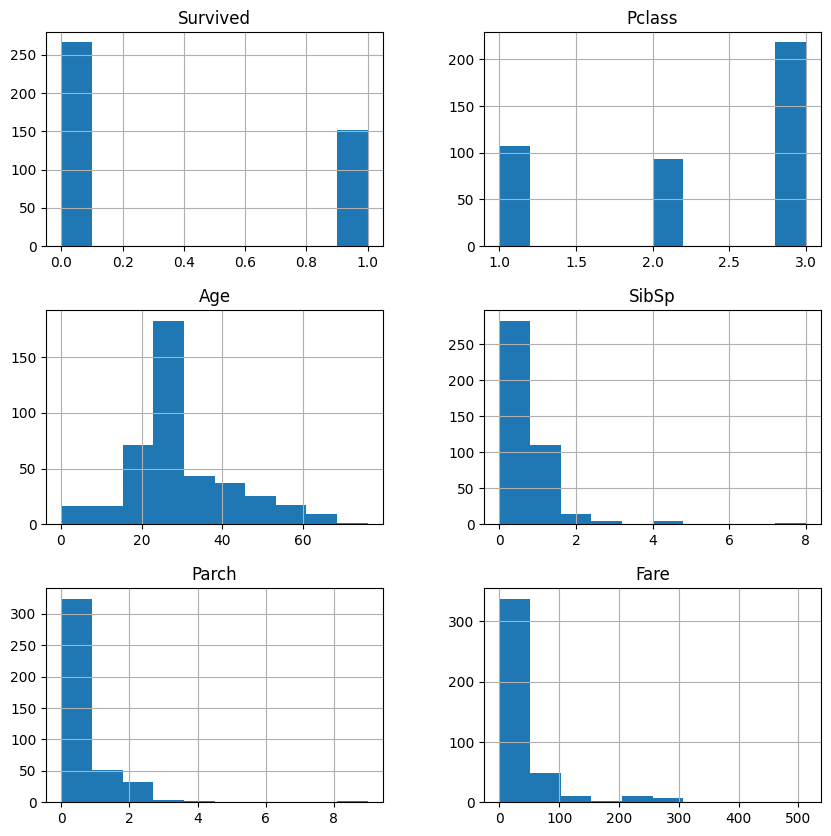

In [ ]:
# Plotting Histplot for Dataset
titanic.hist(figsize=(10,10))
plt.show()

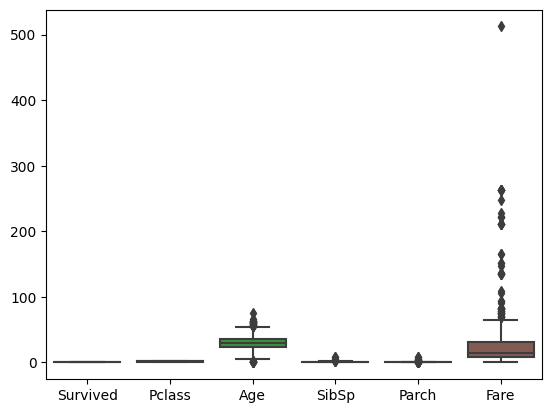

In [ ]:

# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic)
plt.show()

In [ ]:

# showing Correlation
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191514
Pclass,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.577147
Age,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.329071
SibSp,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171539
Parch,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230046
Fare,0.191514,-0.577147,0.329071,0.171539,0.230046,1.000000


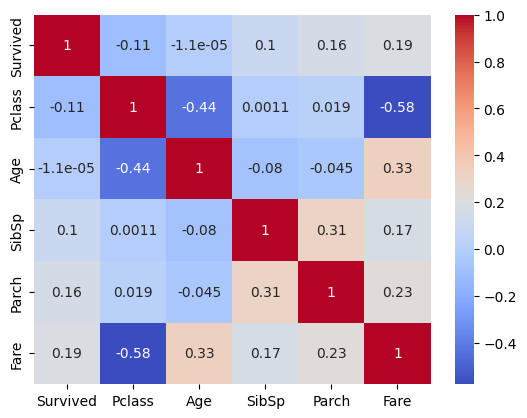

In [ ]:
# Showing Correlation Plot
sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm')
plt.show()

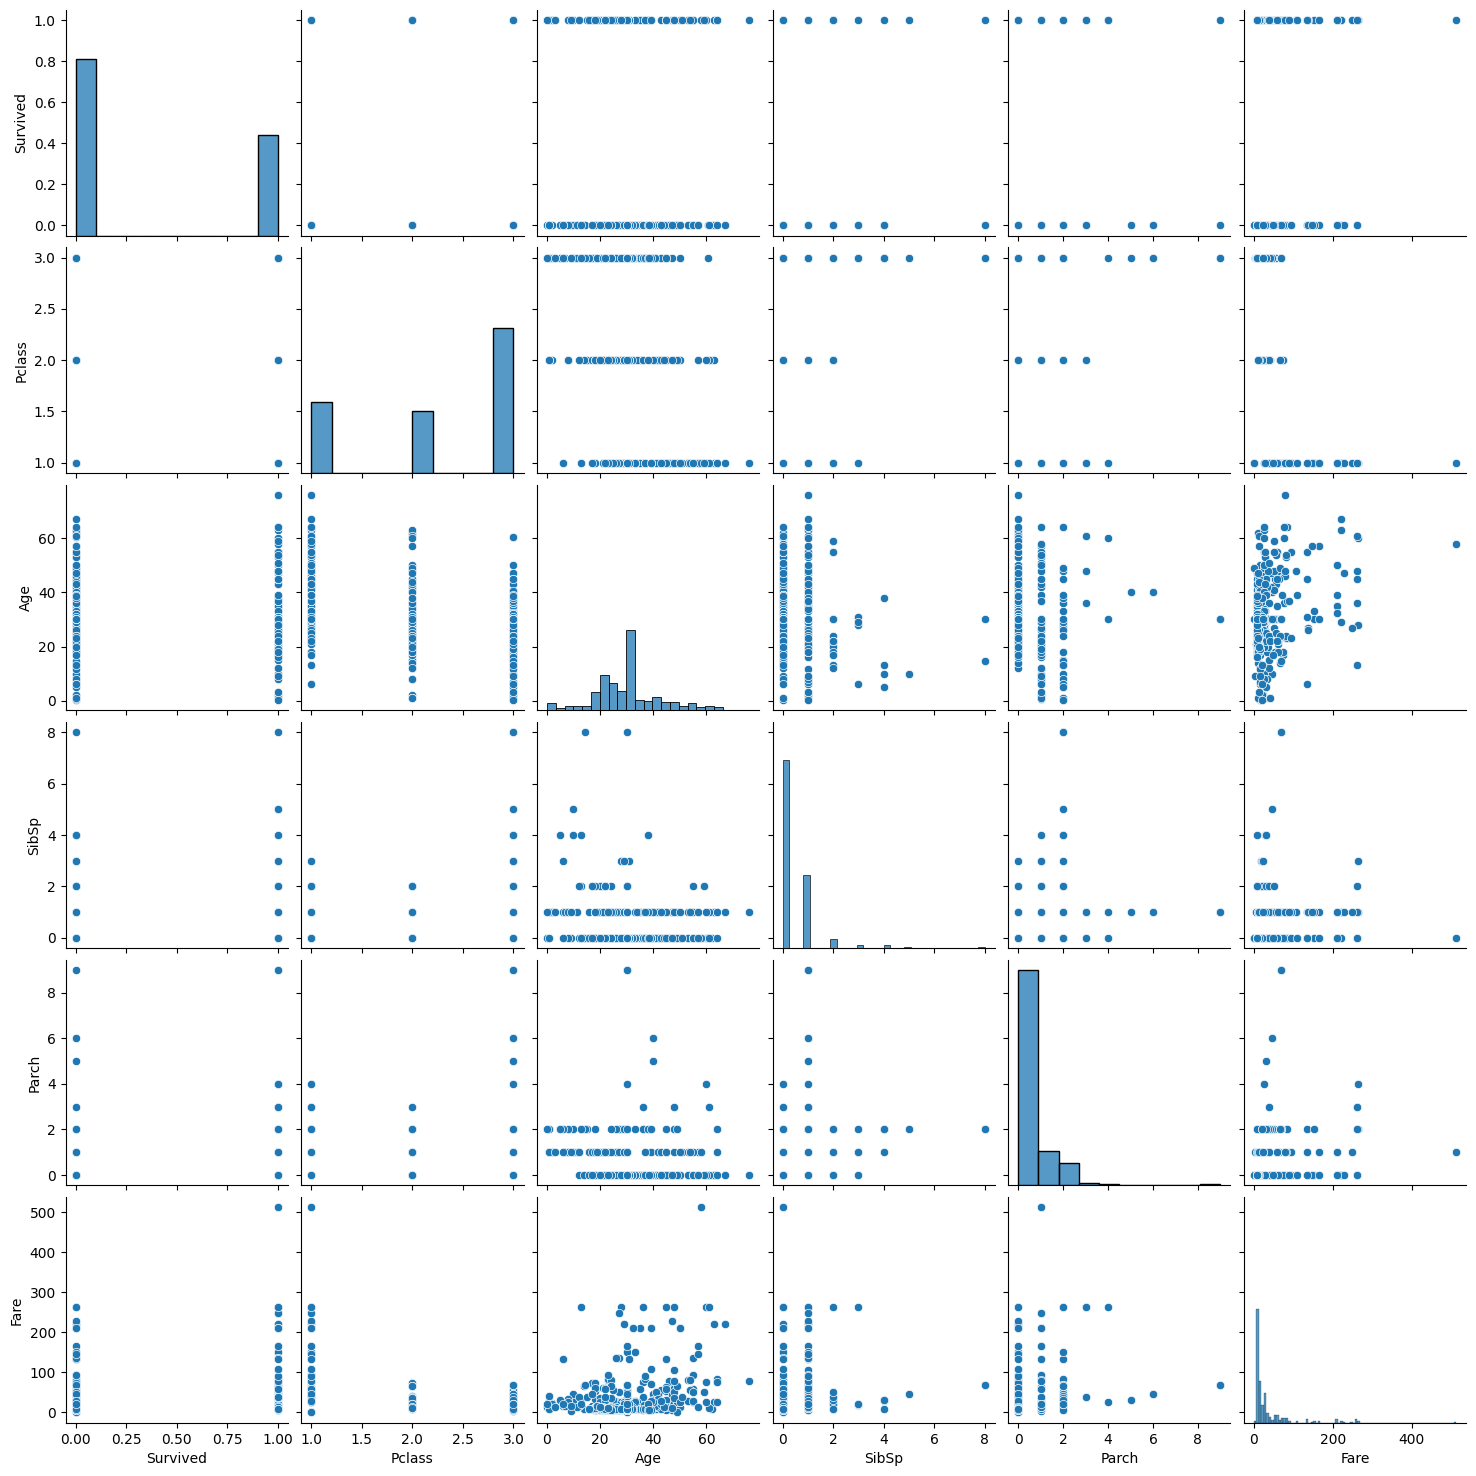

In [ ]:
# Plotting pairplot
sns.pairplot(titanic)
plt.show()

In [ ]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

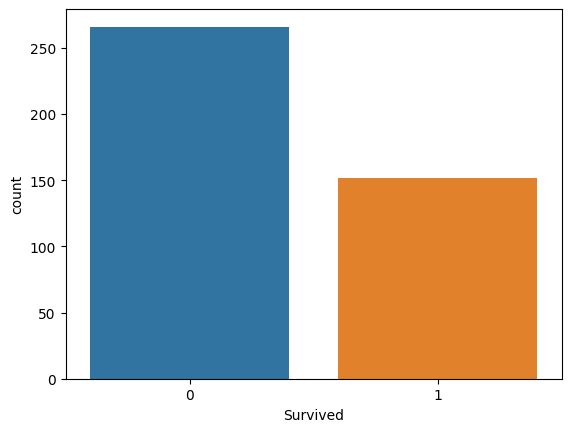

In [ ]:
sns.countplot(x=titanic['Survived'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [ ]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  # DataFrame
print(type(y))  # Series

(418, 7)
(418,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
print(891*0.10)

89.10000000000001


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(376, 7)
(42, 7)
(376,)
(42,)


In [ ]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming x_train contains NaN values
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train_imputed, y_train, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(x_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming x_train is a NumPy array
# Find rows with NaN values and create a mask
nan_mask = np.isnan(x_train).any(axis=1)

# Remove rows with NaN values
x_train = x_train[~nan_mask]
y_train = y_train[~nan_mask]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(x_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
mscore(lr)

Training Score 1.0
Testing Score 1.0


In [ ]:
# Generating Prediction
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  0]
 [ 0 14]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score 1.0


In [ ]:
# Building the knnClassifier Model
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
mscore(knn)

Training Score 0.6958333333333333
Testing Score 0.6333333333333333


In [ ]:
# Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[31 15]
 [ 7  7]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        46
           1       0.32      0.50      0.39        14

    accuracy                           0.63        60
   macro avg       0.57      0.59      0.56        60
weighted avg       0.70      0.63      0.66        60

Accuracy Score 0.6333333333333333


In [ ]:
# Building Support Vector Classifier Model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [ ]:
# Computing Training and Testing score
mscore(svc)

Training Score 0.6125
Testing Score 0.7


In [ ]:
# Generating Prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[41  5]
 [13  1]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        46
           1       0.17      0.07      0.10        14

    accuracy                           0.70        60
   macro avg       0.46      0.48      0.46        60
weighted avg       0.62      0.70      0.65        60

Accuracy Score 0.7


In [ ]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [ ]:
# Computing Training and Testing score
mscore(rfc)

Training Score 1.0
Testing Score 1.0


In [ ]:
# Generating Prediction
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[46  0]
 [ 0 14]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score 1.0


In [ ]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
mscore(dt)

Training Score 1.0
Testing Score 1.0


In [ ]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  0]
 [ 0 14]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score 1.0


In [ ]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [ ]:
# Computing the Training and Testing Score
mscore(ada_boost)

Training Score 1.0
Testing Score 1.0


In [ ]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(x_test)

In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[46  0]
 [ 0 14]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Accuracy Score 1.0


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,1.000000
3,Random Forest Classifier,1.000000
4,Decision Tree Classifier,1.000000
5,Ada Boost Classifier,1.000000
2,SVC,0.700000
1,knn,0.633333


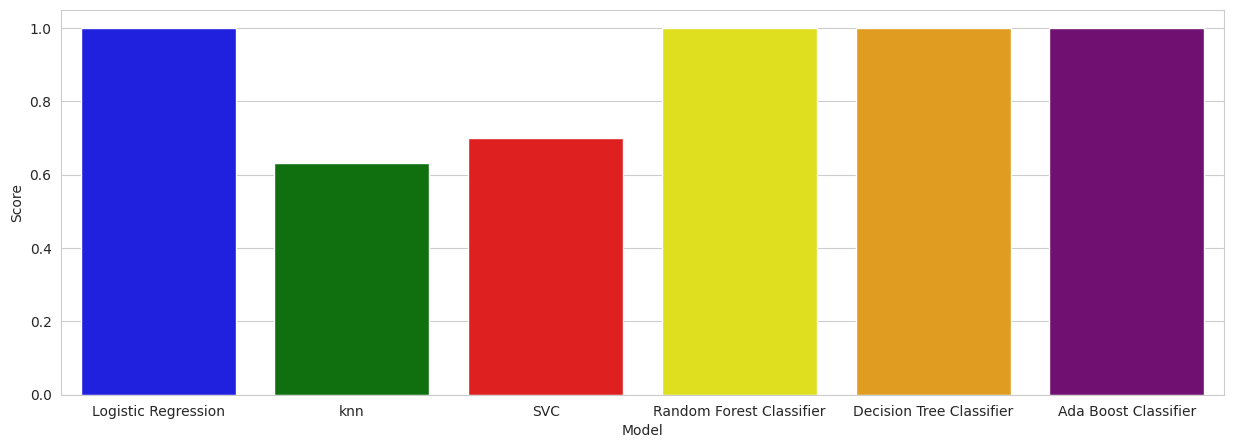

In [ ]:
colors = ["blue", "green", "red", "yellow","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()